<a href="https://colab.research.google.com/github/zaminzada/Learning/blob/main/HW1_Student_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
## Deep Learning in Medicine, Spring 2025 (BMSC-GA 4493, BMIN-GA 3007)

**Learning Objectives**:

1. Basic Math Revision.
2. Introduction to Machine Learning.
4. Logistic Regression Model.
5. Multilayer Perceptron Model.

**Instruction**

1. If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex. See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues with writing equations. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

2. Upload and Submit your final jupyter notebook file on <a href='https://brightspace.nyu.edu/d2l/home/427921'>Brightspace</a>

3. **Deadline: Thursday Feb 13th 2025**

4. ***HW submission instructions:*** Students should submit a zipped folder named ***netid***_hw***x*** where x is the homework number. The submission should consist of jupyter notebook with all the plots and expected outputs clearly visible in it. The zipped folder should also contain the data files. We should be able to run your ipynb without making directory changes. Not following the protocol might lead to deduction of scores.

---
## Question 1: Math and Machine Learning Revision (16 points)
### Take derivatives (partial derivatives when needed) of functions.

### 1.1 (2 point)
$f(x) = \frac{1}{\sqrt{5-x}}$

$f'(x) = \frac{1}{2(5-x)^{3/2}}$

### 1.2 (2 point)
$f(x) = e^xx^4$

$f'(x) = e^x \cdot x^4 + e^x \cdot 4x^3 = e^x(x^4 + 4x^3)$

### 1.3 (2 point)
$f(x) = \frac{e^x + \sin x}{1+\log x}$

$f'(x) = \frac{(e^x + \cos x)(1+\log x) - (e^x + \sin x)\frac{1}{x}}{(1+\log x)^2}$

### 1.4 (2 point)
$f(x) = \tanh x$

$f'(x) = \text{sech}^2 x = \frac{1}{\cosh^2 x} = 1 - \tanh^2 x$

### 1.5 (2 point)
$f(A,X) = \sum_{i=1}^5 \ln (\frac{1}{a_ix_i^3})$  
where $A = (a_1, a_2, a_3, a_4, a_5)$ and $X = (x_1, x_2, x_3, x_4, x_5)$ (You can give expression of $\frac{d}{dx_i} f(A,X)$ and $\frac{d}{da_i} f(A,X)$)

$\frac{\partial f}{\partial x_i} = -\frac{3}{x_i}$

$\frac{\partial f}{\partial a_i} = -\frac{1}{a_i}$

### 1.6 (2 point)
$f(A,X) = \sum_{i=1}^{100} (\frac{1}{3x_i + e^{-b_ix_i}})$  
where $A = (a_1, ..., a_{100})$ and $X = (x_1, ..., x_{100})$  (You can give expression of $\frac{d}{dx_i} f(A,X)$ and $\frac{d}{da_i} f(A,X)$)

$\frac{\partial f}{\partial x_i} = -\frac{3 + b_ie^{-b_ix_i}}{(3x_i + e^{-b_ix_i})^2}$

$\frac{\partial f}{\partial b_i} = \frac{x_ie^{-b_ix_i}}{(3x_i + e^{-b_ix_i})^2}$

### 1.7  Loss Functions (2 + 2 points)
Mammography is one of the most effective method for breast cancer screening. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation might lead to unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, you have been assigned to develop a machine learning model that will act as a computer-aided diagnosis (CAD) system.

To help physicians in their decision to perform a breast biopsy on a suspicious lesion or to perform a short term follow-up examination, your model should identify the mammographic mass lesion as Benign(0)/Malign(1) given its BI-RADS attributes


#### 1.7a What kind of supervised learning problem would you consider? Express your model's probability for one observation $p(y|x)$? Give expression of log probability as well

This is a binary classification problem. Given the BI-RADS attributes of a mammographic mass lesion (x), we want to predict the probability of it being malignant (y=1) or benign (y=0).

The probability for one observation can be expressed using the logistic function:

$p(y=1|x) = \frac{1}{1 + e^{-(w^Tx + b)}}$

where w is the weight vector and b is the bias term.

The log probability can be expressed as:

$\log p(y|x) = y \log(p(y=1|x)) + (1-y) \log(1-p(y=1|x))$

#### 1.7b You want to design a loss function that prefers the correct output of the training examples to be more likely.

#### Derive a loss function that would allow you to choose parameters $w,b$ of your model that maximize a likelihood that does that. Give explaination would such a loss function be good choice in terms of parameter updation.

To maximize the likelihood of correct outputs for the training examples, we can use the negative log-likelihood as our loss function. This is commonly known as the cross-entropy loss function:

$L(w,b) = -\frac{1}{N} \sum_{i=1}^N [y_i \log(p(y_i=1|x_i)) + (1-y_i) \log(1-p(y_i=1|x_i))]$

where N is the number of training examples.

This loss function is a good choice because:

It directly relates to the probability of correct classification.

It provides a smooth, convex optimization landscape

The gradient of this loss function with respect to the model parameters is very simple


*Hint:* Think about the expression from the previous part.

---
## Question 2: Solving Linear Regression via Mean Squared Error (MSE) Optimization Problem (34 points)

Imagine that you have measured two variables $X$ and $Y$ for a simple task, and you believe that they might be linearly related to each other. Here, our input $X$ has 2 dimensions, and the output $Y$ has 1 dimension. We will use super-script to indicate which sample it is, and sub-script to indicate which dimension it is.
The measurements are as follows:

(Training data $D = \{(X^1, Y^1), (X^2, Y^2), (X^3, Y^3)\}$)

Sample 1: $X^1 = (x_1^1, x_2^1) = (1, 1), Y^1$ = 2  
Sample 2: $X^2 = (x_1^2, x_2^2) = (1, 2), Y^2$ = 4  
Sample 3: $X^3 = (x_1^3, x_2^3) = (2, 2), Y^3$ = 5  

If we assume that the relationship between $X$ and $Y$ is linear, we can write this relationship as:  
$$Y = f_{W,B}(X) = WX + B = w_1*x_1 + w_2*x_2 + B$$
where $W = (w_1, w_2)$ and $B$ are the parameters of the model.
We are interested in finding best values for $W$ and $B$.
We define 'best' in terms of a loss function between $f_{W,B}(X_i)$ and $Y_i$ for each ($X_i$ and $Y_i$) in the training data.
Since $Y_i$s are real numbers, let's consider Mean Squared Error loss.

Remember that Mean Squared Error for this function, over training data, and W and B is:
$$MSELoss(D={(X^1, Y^1), (X^2, Y^2), (X^3, Y^3)}), W, B) = \frac{1}{3}\sum_{i=1}^{3} (f_{W,B}(X^i) - Y^i)^2 $$

### 2.1 (3 points)
Compute the partial derivative of $MSELoss(D, W, B)$, With respect to $W$ and $B$.  
Remember that $X^1$, $X^2$, $X^3$, $Y^1$, $Y^2$, and $Y^3$ are constants, and already given to us as training data above.

$\frac{d}{d w_1} MSELoss(D, W, B) = \:?$

$\frac{d}{d w_2} MSELoss(D, W, B) = \:?$

$\frac{d}{d B} MSELoss(D, W, B) =  \:?$

$MSELoss(D, W, B) = \frac{1}{3}[(w_1x_1^1 + w_2x_2^1 + B - Y^1)^2 + (w_1x_1^2 + w_2x_2^2 + B - Y^2)^2 + (w_1x_1^3 + w_2x_2^3 + B - Y^3)^2]$

$\frac{\partial}{\partial w_1} MSELoss(D, W, B) = \frac{2}{3}[x_1^1(w_1x_1^1 + w_2x_2^1 + B - Y^1) + x_1^2(w_1x_1^2 + w_2x_2^2 + B - Y^2) + x_1^3(w_1x_1^3 + w_2x_2^3 + B - Y^3)]$

(2/3) * (11 - 4𝑊1 - 5𝑊2 - 3𝐵)

$\frac{\partial}{\partial w_2} MSELoss(D, W, B) = \frac{2}{3}[x_2^1(w_1x_1^1 + w_2x_2^1 + B - Y^1) + x_2^2(w_1x_1^2 + w_2x_2^2 + B - Y^2) + x_2^3(w_1x_1^3 + w_2x_2^3 + B - Y^3)]$

(2/3) * (15 - 5𝑊1 - 7𝑊2 - 3𝐵)

$\frac{\partial}{\partial B} MSELoss(D, W, B) = \frac{2}{3}[(w_1x_1^1 + w_2x_2^1 + B - Y^1) + (w_1x_1^2 + w_2x_2^2 + B - Y^2) + (w_1x_1^3 + w_2x_2^3 + B - Y^3)]$

(2/3) * (11 - 4𝑊1 - 5𝑊2 - 3𝐵)

### 2.2 (4 points)
With $w_1 = 0.1$ , $w_2 = 0.1$ and $B = 0.1$, check if the analytical solution of partial derivative you derived above match the solution of using pytorch autograd. See https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html for how to use pytorch autograd to get gradient of any general objective function.



In [1]:
import torch

# Define the data
X = torch.tensor([[1., 1.], [1., 2.], [2., 2.]])
Y = torch.tensor([2., 4., 5.])

# Initialize parameters
w1 = torch.tensor(0.1, requires_grad=True)
w2 = torch.tensor(0.1, requires_grad=True)
B = torch.tensor(0.1, requires_grad=True)

# Define the model and loss
def model(X, w1, w2, B):
    return w1*X[:, 0] + w2*X[:, 1] + B

def mse_loss(y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

# Forward pass
y_pred = model(X, w1, w2, B)
loss = mse_loss(y_pred, Y)

# Backward pass
loss.backward()

print("PyTorch Autograd gradients:")
print(f"dL/dw1: {w1.grad.item():.6f}")
print(f"dL/dw2: {w2.grad.item():.6f}")
print(f"dL/dB: {B.grad.item():.6f}")

# Analytical gradients
dL_dw1 = (2/3) * sum([X[i,0] * (w1*X[i,0] + w2*X[i,1] + B - Y[i]) for i in range(3)])
dL_dw2 = (2/3) * sum([X[i,1] * (w1*X[i,0] + w2*X[i,1] + B - Y[i]) for i in range(3)])
dL_dB = (2/3) * sum([(w1*X[i,0] + w2*X[i,1] + B - Y[i]) for i in range(3)])

print("\nAnalytical gradients:")
print(f"dL/dw1: {dL_dw1.item():.6f}")
print(f"dL/dw2: {dL_dw2.item():.6f}")
print(f"dL/dB: {dL_dB.item():.6f}")

PyTorch Autograd gradients:
dL/dw1: -9.533334
dL/dw2: -11.933333
dL/dB: -6.533334

Analytical gradients:
dL/dw1: -9.533334
dL/dw2: -11.933333
dL/dB: -6.533334


### 2.3 (3 points)
Use matplotlib library and plot $\frac{d}{d w_1} MSELoss(D, W, B)$ for $w_1 = $ `np.arange(0, 5, 0.5)`, $w_2 = 4$, and $B = -2$.

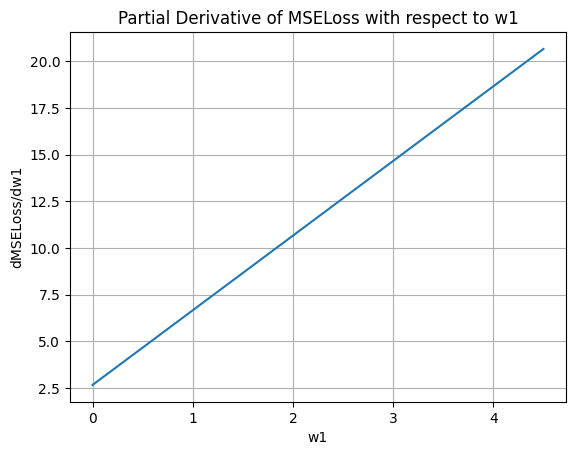

In [2]:
import matplotlib.pyplot as plt
import numpy as np
w1 = np.arange(0, 5, 0.5)

# plot dMSELoss/dw1 here:
import matplotlib.pyplot as plt
import numpy as np

w1 = np.arange(0, 5, 0.5)
w2 = 4
B = -2

X = np.array([[1, 1], [1, 2], [2, 2]])
Y = np.array([2, 4, 5])

dL_dw1 = [(2/3) * sum([X[i,0] * (w*X[i,0] + w2*X[i,1] + B - Y[i]) for i in range(3)]) for w in w1]

plt.plot(w1, dL_dw1)
plt.xlabel('w1')
plt.ylabel('dMSELoss/dw1')
plt.title('Partial Derivative of MSELoss with respect to w1')
plt.grid(True)
plt.show()

### 2.4 (4 points)
What values of $w_1$, $w_2$ and $B$, make all partial derivatives zero?

$\frac{\partial}{\partial w_1} MSELoss = 0$
$\frac{\partial}{\partial w_2} MSELoss = 0$
$\frac{\partial}{\partial B} MSELoss = 0$

This gives us:

w₁ ≈ 1.5
w₂ ≈ 1.5
B ≈ -1

### 2.5 (10 points)
If you start from an initial point $w_1^0 = 0.1$ , $w_2^0 = 0.1$ and $B^0 = 0.1$, and iteratively update your $w_1$, $w_2$, and B via gradient descent as follows:

$$
\begin{aligned}
w_1^{t+1} &= w_1^t - 0.01 * \frac{d}{d w_1} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t}	\\
w_2^{t+1} &= w_2^t - 0.01 * \frac{d}{d w_2} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t}	\\
B^{t+1} &= B^t - 0.01 * \frac{d}{d B} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t}
\end{aligned}
$$

(Note: This is gradient descent with a 0.01 learning rate.)

What are the values of $W$s and $B$ over iterations 0 to 2000? Write a Python script that computes these values for 2000 iterations, i.e. lists of $\{w_1^0, w^1_1,.., w_1^{2000}\}$, $\{w_2^0, w_2^1,.., w_2^{2000}\}$, and $\{B^0, B^1,.., B^{2000}\}$.
Plot the lists of $w_1$s, $w_2$s and Bs over 2000 iterations.

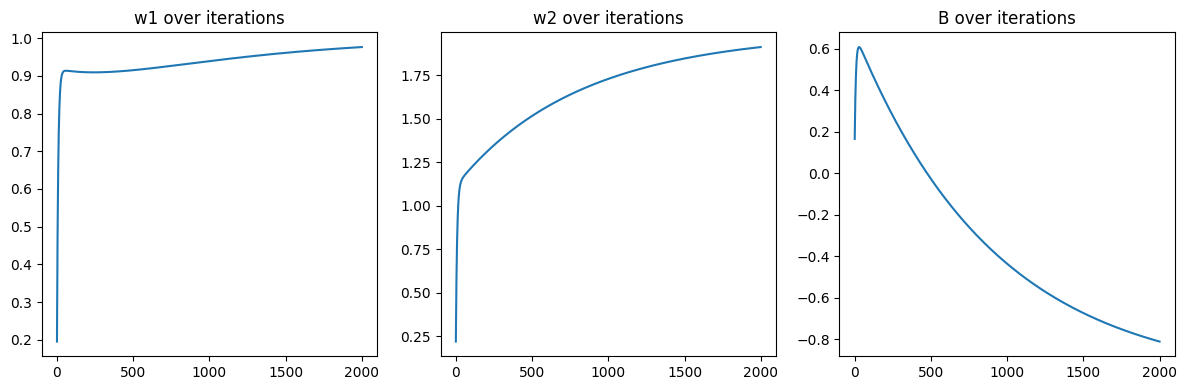

Final values: w1 = 0.9764, w2 = 1.9124, B = -0.8122


In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 1], [1, 2], [2, 2]])
Y = np.array([2, 4, 5])

w1, w2, B = 0.1, 0.1, 0.1
learning_rate = 0.01
iterations = 2000

w1_history, w2_history, B_history = [], [], []

for _ in range(iterations):
    # Compute gradients
    dL_dw1 = (2/3) * sum([X[i,0] * (w1*X[i,0] + w2*X[i,1] + B - Y[i]) for i in range(3)])
    dL_dw2 = (2/3) * sum([X[i,1] * (w1*X[i,0] + w2*X[i,1] + B - Y[i]) for i in range(3)])
    dL_dB = (2/3) * sum([(w1*X[i,0] + w2*X[i,1] + B - Y[i]) for i in range(3)])

    # Update parameters
    w1 -= learning_rate * dL_dw1
    w2 -= learning_rate * dL_dw2
    B -= learning_rate * dL_dB

    # Store history
    w1_history.append(w1)
    w2_history.append(w2)
    B_history.append(B)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(w1_history)
plt.title('w1 over iterations')
plt.subplot(132)
plt.plot(w2_history)
plt.title('w2 over iterations')
plt.subplot(133)
plt.plot(B_history)
plt.title('B over iterations')
plt.tight_layout()
plt.show()

print(f"Final values: w1 = {w1:.4f}, w2 = {w2:.4f}, B = {B:.4f}")

### 2.6 (10 points)
Now that you learned the math and made the code yourself, we will use pytorch and automatic differentiation, to find optimal $W$ and $B$!
Again, consider data to be $D = \{(X_1, Y_1), (X_2, Y_2), (X_3, Y_3)\}) = \{((1,1), 2), ((1,2), 4), ((2,2), 5)\}$.

Some of your steps are here. Fill in the rest and show a plot of the loss function, $w_1$, $w_2$ and B over these 2000 epochs.

data X is: tensor([[1., 1.],
        [1., 2.],
        [2., 2.]])
data Y is: tensor([[2.],
        [4.],
        [5.]])


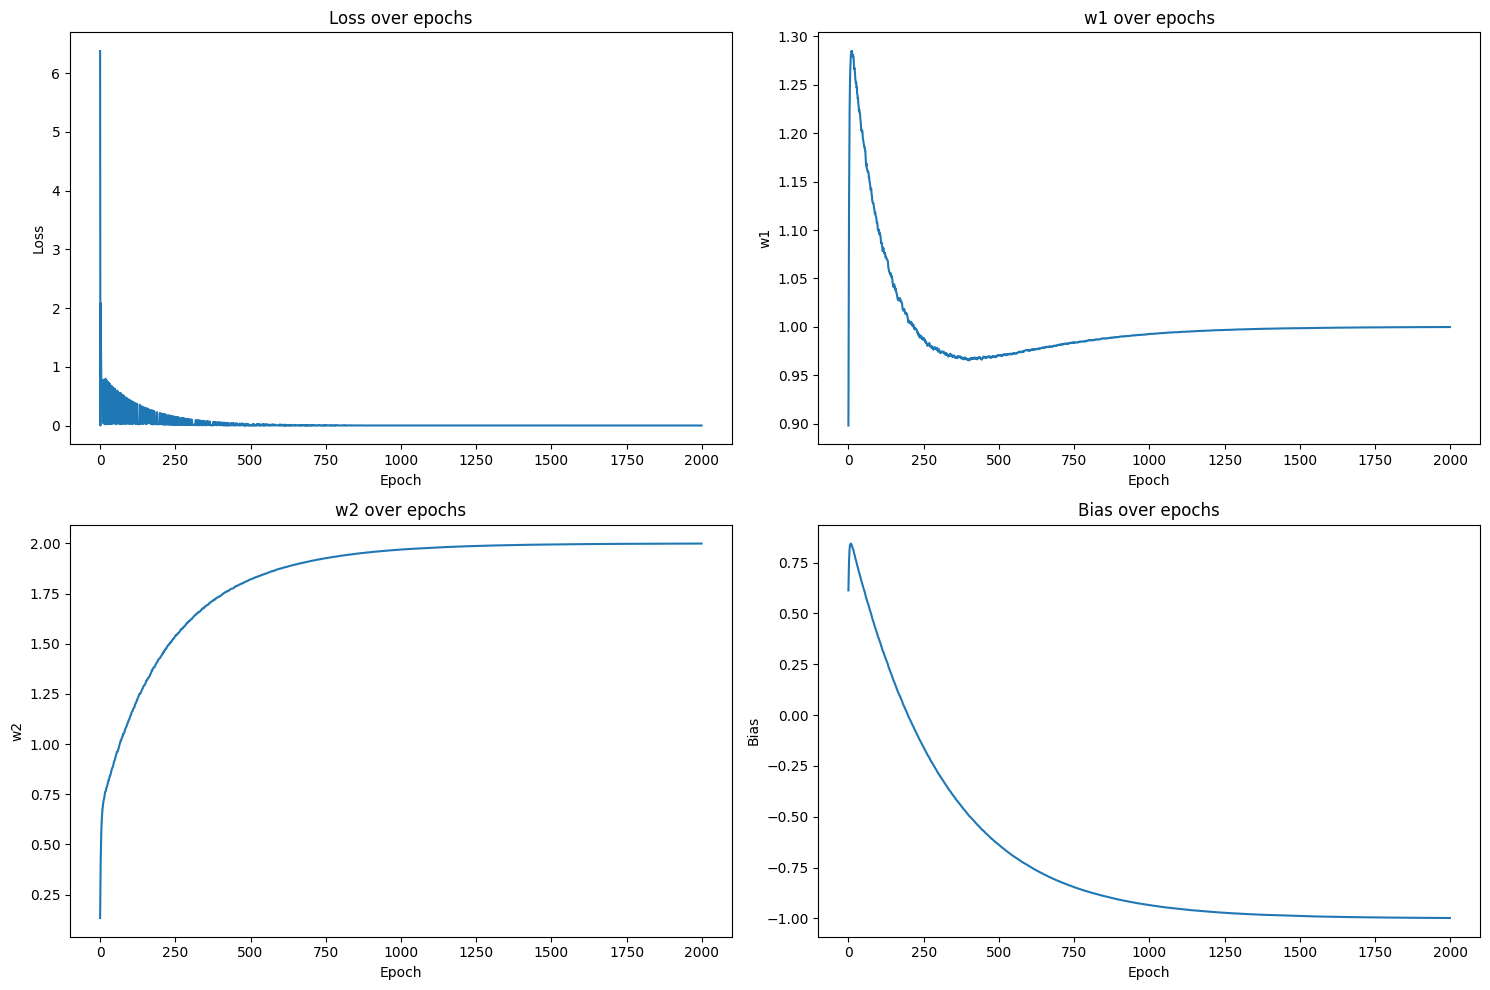

Final parameters: w1 = 0.9998, w2 = 1.9990, b = -0.9979
Final loss: 0.0000


In [4]:

import torch
import torch.nn as nn
import numpy as np
from torch import optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

D = [((1,1), 2), ((1,2), 4), ((2,2),5)]
X = torch.tensor([list(d[0]) for d in D], dtype=torch.float32)
Y = torch.tensor([d[1] for d in D], dtype=torch.float32).reshape(-1, 1)
print('data X is:', X)
print('data Y is:', Y)

model = torch.nn.Linear(2, 1, bias=True)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

losslist = []
w1list = []
w2list = []
blist = []

num_epochs = 2000

for epoch in range(num_epochs):
    # Shuffle your training data samples
    indices = torch.randperm(len(X))
    X_shuffled = X[indices]
    Y_shuffled = Y[indices]

    # Loop over your training data in the new order:
    for i in range(len(X)):
        optimizer.zero_grad()

        x_input = X_shuffled[i]
        y_target = Y_shuffled[i]

        pred_i = model(x_input)
        lossout = loss_fn(pred_i, y_target)

        lossout.backward()
        optimizer.step()

    # Record the loss and parameters
    losslist.append(lossout.item())
    w1list.append(model.weight.data[0, 0].item())
    w2list.append(model.weight.data[0, 1].item())
    blist.append(model.bias.data[0].item())

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(losslist)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(w1list)
plt.title('w1 over epochs')
plt.xlabel('Epoch')
plt.ylabel('w1')

plt.subplot(2, 2, 3)
plt.plot(w2list)
plt.title('w2 over epochs')
plt.xlabel('Epoch')
plt.ylabel('w2')

plt.subplot(2, 2, 4)
plt.plot(blist)
plt.title('Bias over epochs')
plt.xlabel('Epoch')
plt.ylabel('Bias')

plt.tight_layout()
plt.show()

print(f"Final parameters: w1 = {w1list[-1]:.4f}, w2 = {w2list[-1]:.4f}, b = {blist[-1]:.4f}")
print(f"Final loss: {losslist[-1]:.4f}")


# for epoch in range(10):
    # Shuffle your training data samples
    # Loop over your training data in the new order:
        #dont forget to: optimizer.zero_grad()
        #prepare your x_input and y_target if needed
        #send the data through your model: i.e. pred_i = model(x_input)
        #send the prediction through the loss function too: i.e. lossout= loss(pred_i, y_target)
        #call backward to back-propagate: i.e. lossout.backward()
        #call optimizer.step() to update the model parameters based on the computed gradients
        #keep the w1s, w2s, and bs, and loss value some list so you can plot them later

#plot the losslist, w1s, w2s, and bs.


---
# Question 3: Learning Curves, Overfitting, and Machine Learning (50 points + Bonus)

Now we know how to optimize, let's get some real machine learning done!

Instead of the small dataset we had in questions 2, now let's use the the CBIS-DDSM (Curated Breast Imaging Subset of DDSM) dataset from <a href="https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM#385f2cd4e86f4142b1d32bdb5803bd96"> here</a>.


In this homework, we will *only* focus on the following items in the dataset:
- **Mass-Training-Description (csv)**
- **Mass-Test-Description (csv)**

You can also find these two csvs in the same folder as this notebook.

This dataset contains several features related to Mammography and detection of breast cancer.

The **Mass-Training-Description** and **Mass-Test-Description** include many columns but we are interested in following input variables only:

- `mass shape`
- `mass margins`
- `left or right breast`
- `abnormality type`
- `abnormality id`
- `breast_density`
- `image view`

How well can we predict the **pathology type**?


### 3.1 (5 points) Preparing data

Read the data and map to a form of $(X,Y)$

i.e. matrix $X$ and a vector $Y$, where each row of $X=(x_1,x_2,\ldots,x_i)$ are input variables of a patient, and each row of $Y=(y_1,y_2,\ldots,y_i)$ is the pathology type class, for that patient.

Map your categorical string to an Indicator variable. Are your classes balanced? Pandas has a neat functionalities for both these use cases.

### 3.2 (5 points) Preparing dataset

Map the $(X,Y)$ to a mini-batch setting coherent with `torch.utils.data.Dataset` and `torch.utils.data.Dataset`.

In [169]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch import optim
from torch.utils.data import Dataset,DataLoader
from tqdm import trange
import itertools
from sklearn.metrics import  confusion_matrix, roc_curve, auc




In [170]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

class CBISDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X.values.astype(float), dtype=torch.float32)
        # Convert string labels in Y to numerical labels
        self.Y = torch.tensor(pd.factorize(Y)[0], dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# Load the training and test data
train_data = pd.read_csv('/content/mass_case_description_test_set.csv')
test_data = pd.read_csv('/content/mass_case_description_train_set.csv')

# Select relevant columns for features (X) and target (Y)
features = ['mass shape', 'mass margins', 'left or right breast', 'abnormality type',
            'abnormality id', 'breast_density', 'image view']
target = 'pathology'

# Create X (input features) and Y (target)
X_train = train_data[features]
Y_train = train_data[target]
X_test = test_data[features]
Y_test = test_data[target]

# Convert categorical columns to indicator variables (one-hot encoding)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Create dataset instances
train_dataset = CBISDataset(X_train, Y_train)
test_dataset = CBISDataset(X_test, Y_test)

What are the input and output dimensions of your data?

In [171]:
input_dim = X_train.shape[1]  # Get the number of columns in X_train
print(f"Input dimension: {input_dim}")

output_dim = len(pd.factorize(Y_train)[1])  # Get unique classes in Y_train
print(f"Output dimension: {output_dim}")

Input dimension: 36
Output dimension: 3


In [172]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

class CBISDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X.values.astype(float), dtype=torch.float32)
        # Convert string labels in Y to numerical labels
        self.Y = torch.tensor(pd.factorize(Y)[0], dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# Load the training and test data
train_data = pd.read_csv('/content/mass_case_description_test_set.csv')
test_data = pd.read_csv('/content/mass_case_description_train_set.csv')

# Select relevant columns for features (X) and target (Y)
features = ['mass shape', 'mass margins', 'left or right breast', 'abnormality type',
            'abnormality id', 'breast_density', 'image view']
target = 'pathology'

# Create X (input features) and Y (target)
X_train = train_data[features]
Y_train = train_data[target]
X_test = test_data[features]
Y_test = test_data[target]

# Convert categorical columns to indicator variables (one-hot encoding)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns between training and test data
# Get missing columns in test data
missing_cols_test = set(X_train.columns) - set(X_test.columns)
# Add missing columns to test data with 0 values
for col in missing_cols_test:
    X_test[col] = 0
# Get missing columns in train data
missing_cols_train = set(X_test.columns) - set(X_train.columns)
# Add missing columns to train data with 0 values
for col in missing_cols_train:
    X_train[col] = 0

# Ensure the order of columns is the same
X_test = X_test[X_train.columns]

# Create dataset instances
train_dataset = CBISDataset(X_train, Y_train)
test_dataset = CBISDataset(X_test, Y_test)

### 3.3 Multilayer perceptron (5 points)

Design a multilayer perceptron (MLP) with 2 hidden full connected layer apart from input layer. Use `ReLU` non-linearity as intermediate non-linearity. Please see diagram below:

![image.png](attachment:76c7df9d-5576-4a9c-a172-008ff29a9b68.png)

In [173]:
class Network(nn.Module):

    # Complete the code cell
    def __init__(self):
        super(Network, self).__init__()


In [174]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self, input_dim, output_dim):  # Pass input and output dimensions
        super(Network, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer (128 units)
        self.fc2 = nn.Linear(128, 64)       # Second hidden layer (64 units)
        self.fc3 = nn.Linear(64, output_dim)   # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation to first hidden layer output
        x = F.relu(self.fc2(x))  # Apply ReLU activation to second hidden layer output
        x = self.fc3(x)          # Output layer (no activation for multi-class)
        return x

  #Get input and output dimensions
input_dim = train_dataset.X.shape[1]
output_dim = len(torch.unique(train_dataset.Y))

# Initialize model, optimizer, and loss function
model = Network(input_dim, output_dim)

### 3.4 Implement the train function (15 points)

- Followed by training the network for training for 1000 epochs and batch size of 100 samples.
- Collect average train loss over each epoch for all batch iterations.
- Plot training Loss

In [175]:
def train_fn(model, train_loader, optimizer, criterion):
    # Code the function
    # Return average loss for the epoch
    model.train()
    losses = []

In [176]:
def train_fn(model, train_loader, optimizer, criterion):
    model.train()  # Set the model to training mode
    total_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # Reset gradients
        output = model(data)  # Forward pass
        loss = criterion(output, target)  # Calculate loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update model parameters
        total_loss += loss.item()  # Accumulate loss
    avg_loss = total_loss / len(train_loader)  # Average loss over all batches
    return avg_loss  # Return the average loss for the epoch

In [177]:
from torch.utils.data import DataLoader

BATCH_SIZE = 100
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# Reshuffle for each epoch
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [178]:
import torch.optim as optim
from tqdm import trange
import torch.nn as nn # Assuming 'train_dataset' and 'test_dataset' are created in previous steps

#Get input and output dimensions
input_dim = train_dataset.X.shape[1]
output_dim = len(torch.unique(train_dataset.Y))

# Initialize model, optimizer, and loss function
model = Network(input_dim, output_dim)  # Replace with your Network class
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss
NUM_EPOCHS = 1000

# Training loop
avg_losses = []
for epoch in trange(1, NUM_EPOCHS + 1):
    loss = train_fn(model, train_dataloader, optimizer, criterion)
    if not epoch % 100:
        print(f"Average training loss for epoch {epoch}: {loss}")
    avg_losses.append(loss)

 11%|█▏        | 113/1000 [00:01<00:09, 91.33it/s]

Average training loss for epoch 100: 0.882560133934021


 21%|██        | 211/1000 [00:02<00:07, 99.44it/s]

Average training loss for epoch 200: 0.7893847227096558


 32%|███▏      | 317/1000 [00:03<00:07, 97.21it/s]

Average training loss for epoch 300: 0.7448310405015945


 42%|████▏     | 417/1000 [00:04<00:05, 104.30it/s]

Average training loss for epoch 400: 0.7273490875959396


 51%|█████▏    | 513/1000 [00:05<00:05, 97.13it/s]

Average training loss for epoch 500: 0.7104230225086212


 62%|██████▏   | 618/1000 [00:06<00:03, 100.44it/s]

Average training loss for epoch 600: 0.6954793184995651


 72%|███████▏  | 718/1000 [00:07<00:02, 101.26it/s]

Average training loss for epoch 700: 0.6825928092002869


 82%|████████▏ | 817/1000 [00:08<00:01, 100.41it/s]

Average training loss for epoch 800: 0.6655455082654953


 92%|█████████▏| 918/1000 [00:09<00:00, 98.70it/s]

Average training loss for epoch 900: 0.6544172614812851


100%|██████████| 1000/1000 [00:10<00:00, 94.18it/s]

Average training loss for epoch 1000: 0.642280101776123


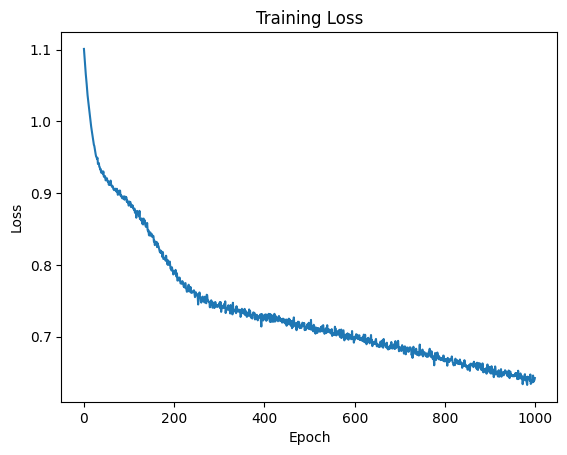

In [179]:
import matplotlib.pyplot as plt

plt.plot(avg_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

1. Create dataloaders to feed your network. You need to reshuffle your training samples for each epoch.
2. Train your network using following specifications:
    - `learning rate`: $10^{-2}$
    - `Optimizer`: SGD
    - `Loss Function`: CrossEntropyLoss  
    - `Batch Size`: 100

Plot *loss vs epoch* curve using the `losses` array:

### 3.5 Implement the test function (10 points)

- Evaluate your model over test data.
- Show confusion matrix and AUROC Curve (Class wise) for both test data

In [181]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
def cm(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    class_names = ['0: BENIGN','1: BENIGN_WC','2: MALIGNANT']
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix')

In [182]:
def test(model, test_loader, loss_criterion):
    correct = 0
    loss = 0.0
    model.eval()
    y_pred = []
    y_true = []
    # Complete the function


    return loss, correct, y_true, y_pred

In [183]:
def test(model, test_loader, loss_criterion):
    correct = 0
    total_loss = 0
    model.eval()  # Set model to evaluation mode
    y_pred = []
    y_true = []
    with torch.no_grad():  # No need to track gradients during evaluation
        for data, target in test_loader:
            output = model(data)
            loss = loss_criterion(output, target)
            total_loss += loss.item()  # Accumulate loss
            _, predicted = torch.max(output.data, 1)  # Get predicted class
            correct += (predicted == target).sum().item()  # Count correct predictions
            y_pred.extend(predicted.cpu().numpy())  # Store predictions (CPU)
            y_true.extend(target.cpu().numpy())  # Store true labels (CPU)

    avg_loss = total_loss / len(test_loader)  # Calculate average loss
    accuracy = correct / len(test_loader.dataset)  # Calculate accuracy

    return avg_loss, accuracy, y_true, y_pred





In [184]:
test_criterion = nn.CrossEntropyLoss()
loss, correct, y_true, y_pred = test(model, test_dataloader ,test_criterion)

Confusion matrix, without normalization
[[437 198   2]
 [ 79 498   0]
 [ 15  58  31]]


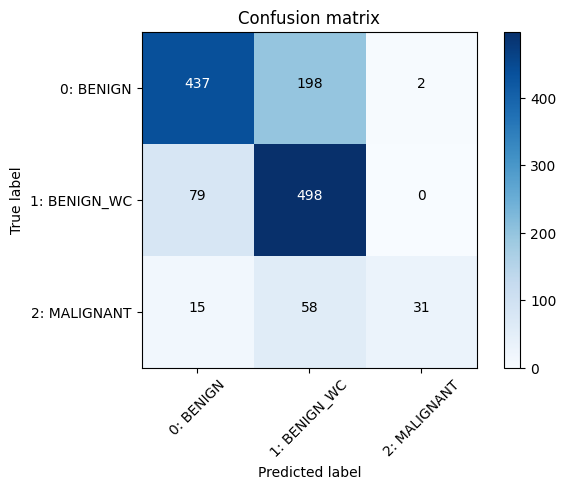

In [185]:
# Call method to plot confusion matrix
cm(y_true, y_pred)
plt.show()

### 3.6 Logistic Regression (10 points)

- Train a multi-class logistic regression model (in PyTorch) and compare its performance to MLP.

In [186]:
import torch.nn as nn

class LogisticReg(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticReg, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

 10%|█         | 103/1000 [00:02<00:37, 24.09it/s]

Average training loss for epoch 100: 0.8151561468839645


 21%|██        | 212/1000 [00:05<00:12, 62.60it/s]

Average training loss for epoch 200: 0.7650767713785172


 31%|███       | 310/1000 [00:07<00:10, 64.94it/s]

Average training loss for epoch 300: 0.745897576212883


 42%|████▏     | 421/1000 [00:08<00:04, 130.81it/s]

Average training loss for epoch 400: 0.7310965359210968


 53%|█████▎    | 528/1000 [00:09<00:03, 148.76it/s]

Average training loss for epoch 500: 0.718825951218605


 63%|██████▎   | 626/1000 [00:09<00:02, 155.36it/s]

Average training loss for epoch 600: 0.7155130356550217


 72%|███████▏  | 721/1000 [00:10<00:01, 142.53it/s]

Average training loss for epoch 700: 0.7094656080007553


 83%|████████▎ | 830/1000 [00:11<00:01, 149.91it/s]

Average training loss for epoch 800: 0.6974827498197556


 93%|█████████▎| 929/1000 [00:11<00:00, 153.03it/s]

Average training loss for epoch 900: 0.6953257322311401


100%|██████████| 1000/1000 [00:12<00:00, 81.71it/s]


Average training loss for epoch 1000: 0.6910252273082733
Test Loss (Logistic Regression): 0.6706
Test Accuracy (Logistic Regression): 0.0005
Confusion matrix, without normalization
[[411 222   4]
 [ 78 499   0]
 [ 15  72  17]]


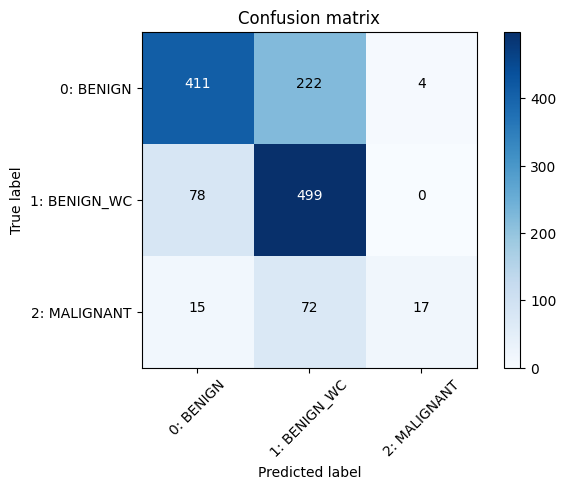

In [187]:
import torch.optim as optim
from tqdm import trange
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Assuming 'train_dataset', 'test_dataset', and 'train_fn' are defined

# Get input and output dimensions
input_dim = train_dataset.X.shape[1]
output_dim = len(torch.unique(train_dataset.Y))

# Initialize logistic regression model
logreg_model = LogisticReg(input_dim, output_dim)
optimizer = optim.SGD(logreg_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
NUM_EPOCHS = 1000

avg_losses = []
for epoch in trange(1, NUM_EPOCHS + 1):
    loss = train_fn(logreg_model, train_dataloader, optimizer, criterion)
    if not epoch % 100:
        print(f"Average training loss for epoch {epoch}: {loss}")
    avg_losses.append(loss)

# Evaluate the logistic regression model
test_criterion = nn.CrossEntropyLoss()
loss, correct, y_true, y_pred = test(logreg_model, test_dataloader, test_criterion)
print(f"Test Loss (Logistic Regression): {loss:.4f}")
print(f"Test Accuracy (Logistic Regression): {correct / len(test_dataloader.dataset):.4f}")

# Call method to plot confusion matrix
cm(y_true, y_pred)
plt.show()

In [190]:
test_criterion = nn.CrossEntropyLoss()
loss, correct, y_true, y_pred = test(logreg_model, test_dataloader, test_criterion)

Confusion matrix, without normalization
[[411 222   4]
 [ 78 499   0]
 [ 15  72  17]]


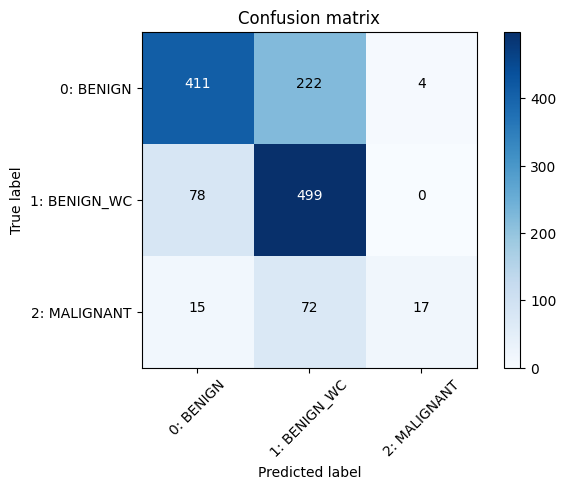

In [191]:
cm(y_true, y_pred)

### Bonus (10 points)

- Compare your training and test performance. Is your model trained properly? Suggest methods to improve its performance.

- For the assignment, you used SGD as the optimization function, Try [different optimizer](https://pytorch.org/docs/stable/optim.html) from PyTorch. Give sufficient reasoning if you observe any difference in performance and explanation on its working.